# Noisy QFT with initial I0> state

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
from qiskit import execute, transpile, assemble
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
print("Import Successfully")

Import Successfully


## Noisy QFT

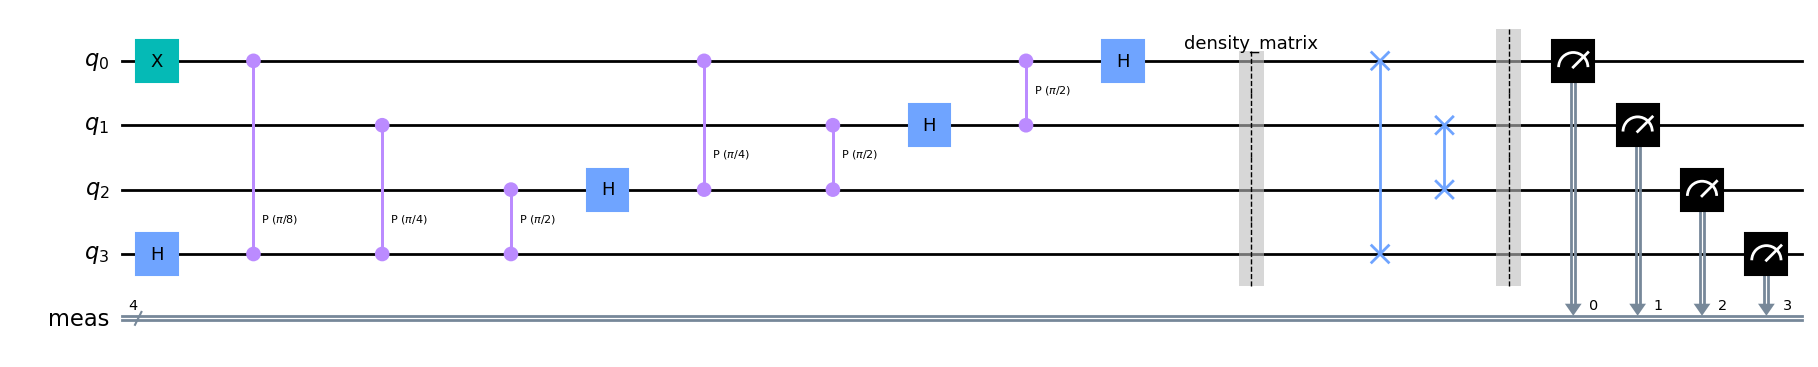

In [11]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    epsilon = 1                    
    extracted = random.uniform(0, 1)
    if (extracted < epsilon):
        circuit.x(0) 
    qft_rotations(circuit, n)
    qc_noisy.save_density_matrix()
    swap_registers(circuit, n)
    return circuit

qubits = 4  
qc_noisy = QuantumCircuit(qubits)
qft(qc_noisy,qubits)
qc_noisy.measure_all()
qc_noisy.draw(fold = -1, output = 'mpl')


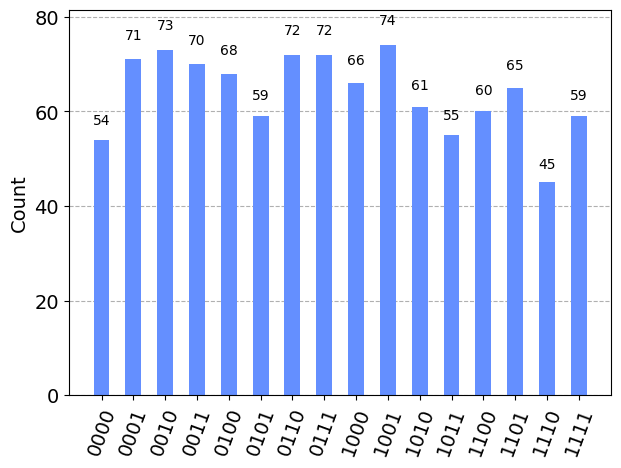

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_noisy, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 1024).result()

density_matrix = results.data().get('density_matrix')
density_matrix = np.asarray(density_matrix)
counts = results.get_counts()
plot_histogram(counts)    

## Ideal QFT

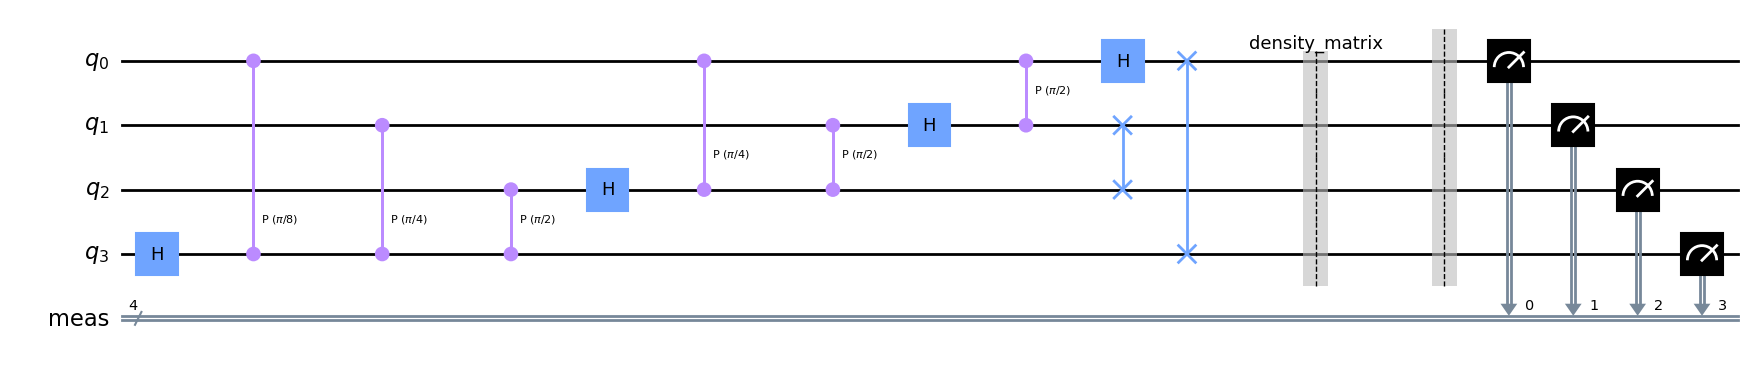

In [13]:
def qft_rotations(circuit, n):
   
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qubits = 4    #sistem-dimension
qc_ideal = QuantumCircuit(qubits)

#for i in range(qubits):
#    qc_ideal.h(i)
    
qft(qc_ideal,qubits)
qc_ideal.save_density_matrix()
qc_ideal.measure_all()

qc_ideal.draw(fold = -1, output = 'mpl')

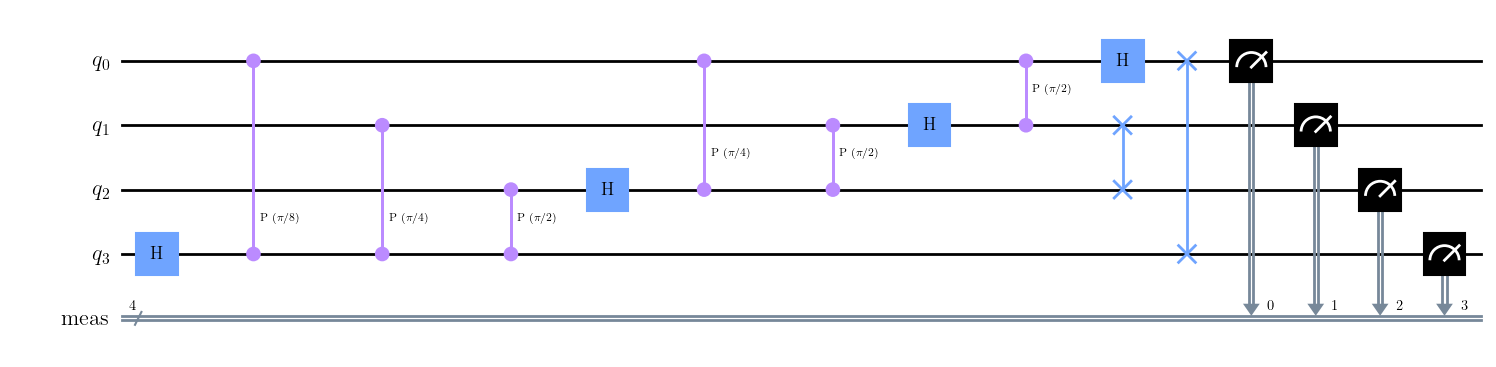

In [50]:
from qiskit.tools.visualization import circuit_drawer
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16, 6))

circuit_drawer(qc_ideal, output='latex_source',filename = 'qc_ideal.tex', style={'backgroundcolor': '#EEEEEE'}, plot_barriers=False)
qc_ideal.draw(fold = -1, output = 'mpl', plot_barriers=False)



det = 0j


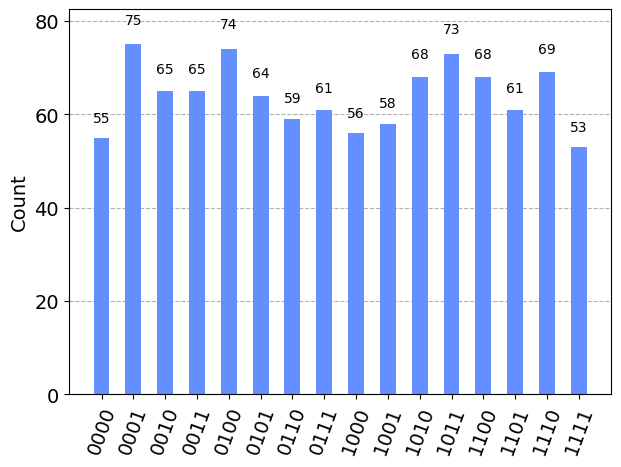

In [14]:
density_matrix_ideal = 0
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_ideal, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 1024).result()

density_matrix_ideal = results.data().get('density_matrix')
density_matrix_ideal = np.asarray(density_matrix_ideal)

print('det =', np.linalg.det(density_matrix_ideal))
counts = results.get_counts()
plot_histogram(counts)    


## Noisy-Ideal Comparison

In [23]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
        
    epsilon = 0.2                    
    extracted = random.uniform(0, 1)
    if (extracted < epsilon):    
        circuit.z(1)
        
    circuit.h(n)  
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)        
    qc_noisy.save_density_matrix()
    return circuit

distanze = []

runs = 100
for i in range(runs):
    qubits = 4                            
    qc_noisy = QuantumCircuit(qubits)
    qft(qc_noisy,qubits)

    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc_noisy, aer_sim)
    qobj = assemble(t_qc)                                
    results = aer_sim.run(qobj, shots = 1).result()

    density_matrix = results.data().get('density_matrix')
    density_matrix = np.asarray(density_matrix)

    diff = density_matrix - density_matrix_ideal
    mult = np.matmul(np.transpose(diff), diff)
    rad = np.sqrt(mult)
    distanze.append((rad.trace()/2).real)
    

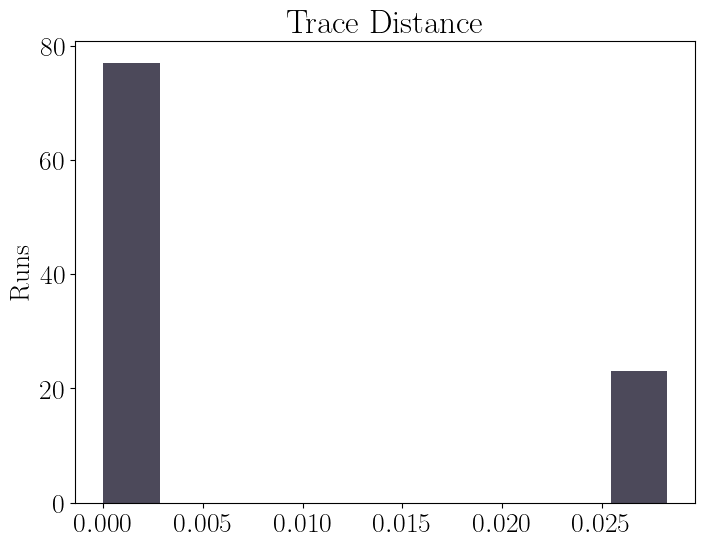

In [51]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8, 6))
params = {'text.usetex' : True, 'font.size' : 20, 'font.family' : 'serif'}
plt.rcParams.update(params)

plt.title('Trace Distance')
plt.ylabel('Runs')
plt.hist(distanze, color = '#4C495A')
plt.savefig('QFT_errors.pdf', format = 'pdf')